In [1]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.geochemistry.PEC as pec
import pandas as pd
import elements as e
import matplotlib.pyplot as plt
import meltInc.plotting as p

p.layout()
config = mp.configuration()
config.melt_thermometer = "putirka2008_14"
config.print()

Kd Fe-Mg ol-melt.......................toplis
Melt Fe3+/Fe2+........................borisov
Melt thermometer...............putirka2008_14
Volatile solubility model......IaconoMarziano


In [2]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
olivine = mp.read_olivine('./olivine.csv', index_col=['name'], total_col="total")

In [3]:
idx = 6
forsterites = olivine.forsterite
inclusion = melt.iloc[idx, :].copy()
ol_host = olivine.iloc[idx, :].copy()
Fo = 0.9
FeO_initial = 11.2
P_bar = 2e3
Fo

0.9

In [4]:
w, t, kd, oc = pec.Fe_equilibrate(inclusion, Fo, P_bar, stepsize=0.001)

In [5]:
kd, oc

((0.28028836141177854, 0.27860058782233044), -0.02550000000000002)

In [6]:
inclusion_2 = w.iloc[-1]

In [7]:
inclusion_2

SiO2      45.355330
Al2O3     18.388847
MgO        7.946986
CaO       10.171897
FeO        7.236737
Na2O       4.107446
K2O        1.444603
MnO        0.185206
TiO2       3.283282
P2O5       1.026862
Cr2O3      0.000000
CO2        0.213809
H2O        0.374460
F          0.092397
S          0.103509
Cl         0.068629
total    100.000000
Name: -0.014000000000000005, dtype: float64

In [13]:
w2, om, kd2, t = pec.crystallisation_correction(inclusion_2, Fo, FeO_initial, P_bar, stepsize=0.001)

In [14]:
om

-0.06300000000000004

In [15]:
t, om

((1460.7960836557409, 1504.597839006356), -0.06300000000000004)

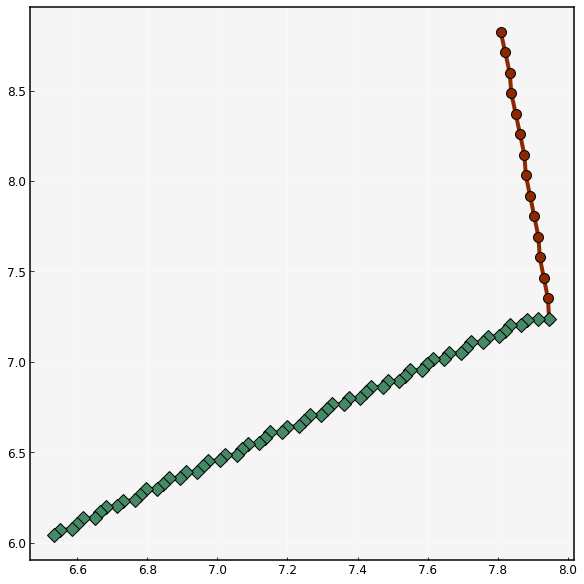

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(w["MgO"], w["FeO"], "-o")
plt.plot(w2["MgO"], w2["FeO"], "-D")
